## Introduction aux APIs 

* Une API (Application Programming Interface) est un ensemble de règles permettant à deux applications distinctes de communiquer entre elles et d’échanger des données.
* Elle agit comme une interface entre des données existantes et un programme indépendant, évitant ainsi de redévelopper entièrement une application pour y intégrer de nouvelles informations.

* Les API sont essentielles pour permettre à différentes applications ou systèmes de partager des données ou des fonctionnalités, que ce soit au sein d’une entreprise ou avec des services externes.

* Elles facilitent l’intégration de services tiers, comme les passerelles de paiement ou les plateformes de cartographie, dans des applications existantes.

### Objectifs:

Développer une API RESTful en Python (Flask ou FastAPI) pour exposer la base de connaissance à une application (ex. : chatbot).




* Une API (Application Programming Interface) est un ensemble de règles permettant à deux applications distinctes de communiquer entre elles et d’échanger des données.
* Elle agit comme une interface entre des données existantes et un programme indépendant, évitant ainsi de redévelopper entièrement une application pour y intégrer de nouvelles informations.

* Les API sont essentielles pour permettre à différentes applications ou systèmes de partager des données ou des fonctionnalités, que ce soit au sein d’une entreprise ou avec des services externes.

* Elles facilitent l’intégration de services tiers, comme les passerelles de paiement ou les plateformes de cartographie, dans des applications existantes.

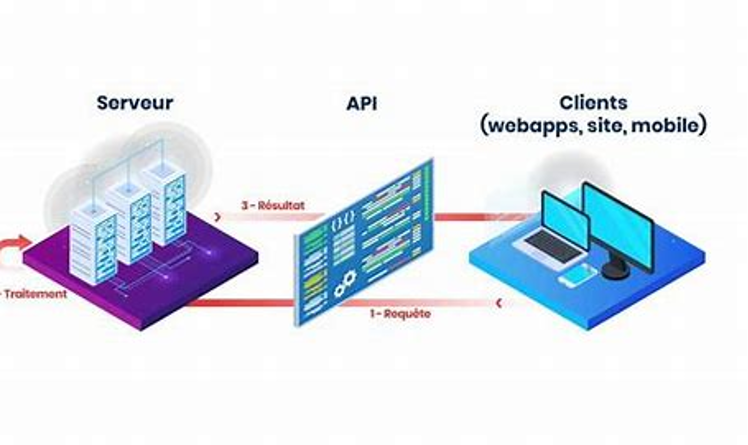

https://datascientest.com/api-tout-savoir

FastAPI génère automatiquement une documentation interactive de votre API grâce à Swagger UI, accessible par défaut à l'adresse /docs.Cette interface permet de :

Visualiser tous les endpoints disponibles.

Tester les requêtes directement depuis le navigateur.

Voir les schémas de données et les réponses attendues.

=>Cette fonctionnalité repose sur la spécification OpenAPI, garantissant une documentation conforme aux standards.


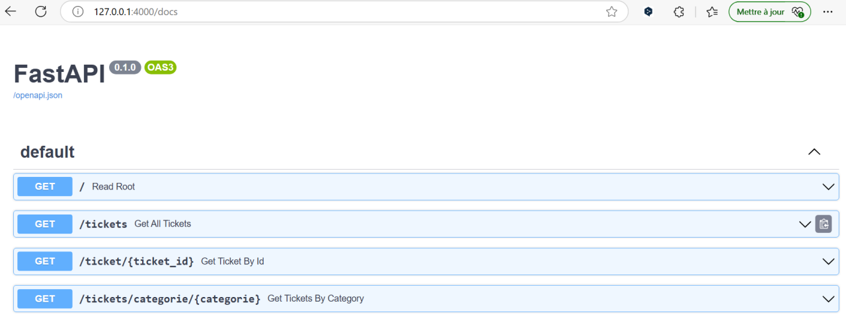


https://python.plainenglish.io/understanding-fastapi-fundamentals-a-guide-to-fastapi-uvicorn-starlette-swagger-ui-and-1a377ee5b9a6

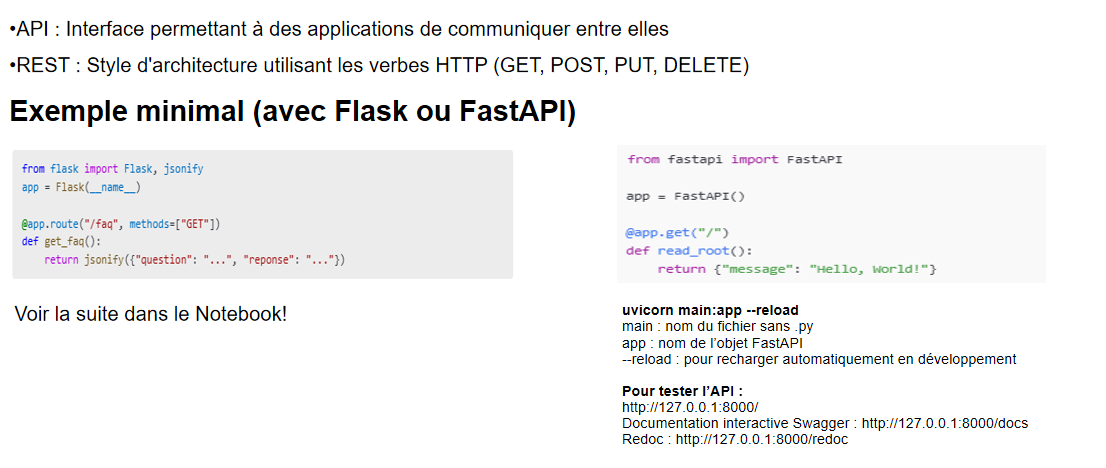

In [1]:
# Importer les dépendances
from fastapi import FastAPI, Depends, HTTPException
import sqlite3
from fastapi import FastAPI, HTTPException
from fastapi.responses import JSONResponse
import nest_asyncio
import uvicorn

In [2]:

# Pour exécuter FastAPI dans un notebook
nest_asyncio.apply()

app = FastAPI()


# Route simple sans paramètre
@app.get("/")
async def root():
    return {"message": "Hello World! !"}

# Route avec un paramètre de chemin (path parameter)
@app.get("/utilisateur/{user_id}")
async def get_user(user_id: int):
    return {"message": f"Infos de l'utilisateur avec l'ID {user_id}"}

# Route avec un paramètre de chemin "UserName" (username path parameter)
@app.get("/{user_name}")
async def get_userName(user_name: str):
    return {"What's your name ?": f"My name is {user_name}"}

# Lancer l'application (dans un notebook)
uvicorn.run(app, host="127.0.0.1", port=4000)



INFO:     Started server process [1528]
INFO:     Waiting for application startup.
INFO:     Application startup complete.
INFO:     Uvicorn running on http://127.0.0.1:4000 (Press CTRL+C to quit)


INFO:     127.0.0.1:49961 - "GET / HTTP/1.1" 200 OK
INFO:     127.0.0.1:49961 - "GET /favicon.ico HTTP/1.1" 200 OK
INFO:     127.0.0.1:49961 - "GET / HTTP/1.1" 200 OK
INFO:     127.0.0.1:49961 - "GET /favicon.ico HTTP/1.1" 200 OK
INFO:     127.0.0.1:49968 - "GET /home HTTP/1.1" 200 OK
INFO:     127.0.0.1:49968 - "GET /favicon.ico HTTP/1.1" 200 OK
INFO:     127.0.0.1:49968 - "GET /utilisateur/1 HTTP/1.1" 200 OK
INFO:     127.0.0.1:49968 - "GET /favicon.ico HTTP/1.1" 200 OK
INFO:     127.0.0.1:49968 - "GET /utilisateur/1 HTTP/1.1" 200 OK
INFO:     127.0.0.1:49968 - "GET /favicon.ico HTTP/1.1" 200 OK
INFO:     127.0.0.1:49968 - "GET /utilisateur/2 HTTP/1.1" 200 OK
INFO:     127.0.0.1:49968 - "GET /favicon.ico HTTP/1.1" 200 OK
INFO:     127.0.0.1:49968 - "GET /utilisateur/2 HTTP/1.1" 200 OK
INFO:     127.0.0.1:49968 - "GET /favicon.ico HTTP/1.1" 200 OK
INFO:     127.0.0.1:49968 - "GET /gadji HTTP/1.1" 200 OK
INFO:     127.0.0.1:49968 - "GET /favicon.ico HTTP/1.1" 200 OK
INFO:     127.0.0.1

INFO:     Shutting down
INFO:     Waiting for application shutdown.
INFO:     Application shutdown complete.
INFO:     Finished server process [1528]


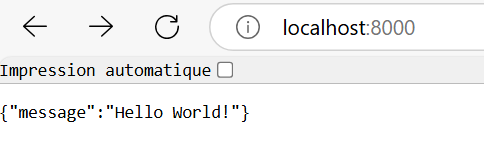

### Créer une API et exploiter une base de connaissance

In [ ]:
import sqlite3
import nest_asyncio
import uvicorn
from fastapi import FastAPI, Form, Request
from fastapi.responses import HTMLResponse

nest_asyncio.apply()
app = FastAPI()

# --- Initialisation de la base SQLite ---
def init_db():
    conn = sqlite3.connect("simple_users.db")
    cur = conn.cursor()
    cur.execute("""
        CREATE TABLE IF NOT EXISTS users (
            id INTEGER PRIMARY KEY AUTOINCREMENT,
            nom TEXT NOT NULL,
            email TEXT NOT NULL UNIQUE
        )
    """)
    conn.commit()
    conn.close()

init_db()

# --- Page formulaire ---
# --- Endpoint ---
# --- @ décorateur ---
@app.get("/", response_class=HTMLResponse)
async def formulaire_ajout():
    # --- Trois guillemets pour écrire une chaine de caractères avec retour à la ligne ---
    return """
    <h2>Ajouter un utilisateur</h2>
    <form action="/add-user" method="post">
        Nom : <input type="text" name="nom"><br>
        Email : <input type="email" name="email"><br>
        <input type="submit" value="Ajouter">
    </form>
    """

# --- Ajouter un utilisateur via POST ---
@app.post("/add-user")
async def ajouter_utilisateur(nom: str = Form(...), email: str = Form(...)):
    try:
        conn = sqlite3.connect("simple_users.db")
        cur = conn.cursor()
        cur.execute("INSERT INTO users (nom, email) VALUES (?, ?)", (nom, email))
        conn.commit()
        message = f"Utilisateur {nom} ajouté avec succès !"
    except sqlite3.IntegrityError:
        message = f"Erreur : l’email {email} est déjà utilisé."
    finally:
        conn.close()
    return HTMLResponse(f"<p>{message}</p><a href='/'>Retour</a>")

# --- Lire tous les utilisateurs ---
@app.get("/users")
async def get_users():
    conn = sqlite3.connect("simple_users.db")
    cur = conn.cursor()
    cur.execute("SELECT * FROM users")
    rows = cur.fetchall()
    conn.close()
    return {"utilisateurs": rows}

# --- Supprimer un utilisateur ---
@app.get("/delete-user/{user_id}")
async def delete_user(user_id: int):
    conn = sqlite3.connect("simple_users.db")
    cur = conn.cursor()
    cur.execute("DELETE FROM users WHERE id = ?", (user_id,))
    conn.commit()
    conn.close()
    return {"message": f"Utilisateur {user_id} supprimé."}


# --- Lancer l’app ---
uvicorn.run(app, host="127.0.0.1", port=4000)


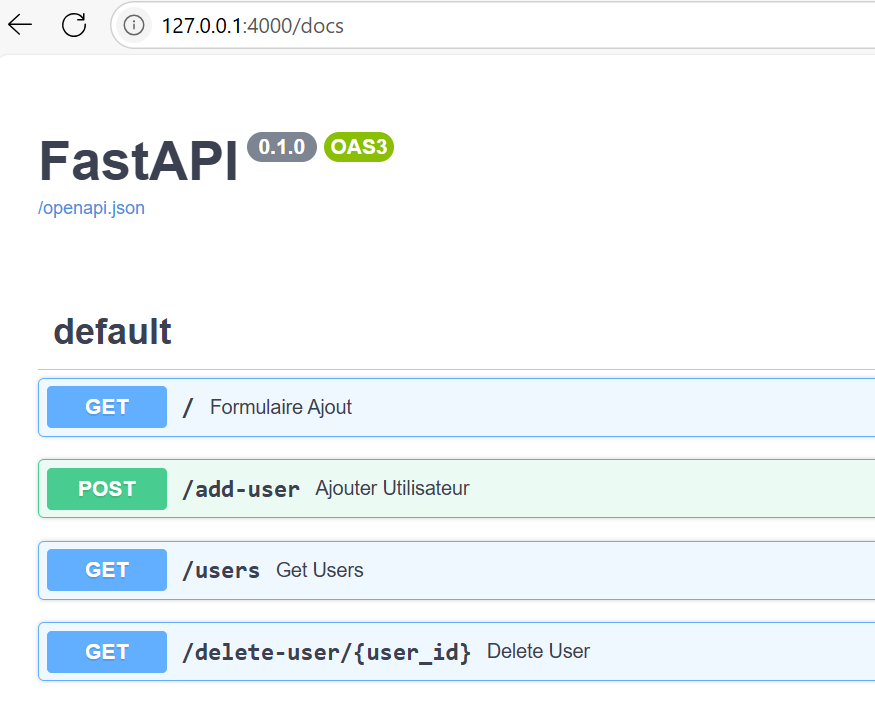

## Suite Brief des Livres

Reprendre votre brief des livres et créer une API FastAPI avec 2 routes simples de votre choix